In [1]:
# Loading co2 dataset
co2

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
1959 315.42 316.31 316.50 317.56 318.13 318.00 316.39 314.65 313.68 313.18
1960 316.27 316.81 317.42 318.87 319.87 319.43 318.01 315.74 314.00 313.68
1961 316.73 317.54 318.38 319.31 320.42 319.61 318.42 316.63 314.83 315.16
1962 317.78 318.40 319.53 320.42 320.85 320.45 319.45 317.25 316.11 315.27
1963 318.58 318.92 319.70 321.22 322.08 321.31 319.58 317.61 316.05 315.83
1964 319.41 320.07 320.74 321.40 322.06 321.73 320.27 318.54 316.54 316.71
1965 319.27 320.28 320.73 321.97 322.00 321.71 321.05 318.71 317.66 317.14
1966 320.46 321.43 322.23 323.54 323.91 323.59 322.24 320.20 318.48 317.94
1967 322.17 322.34 322.88 324.25 324.83 323.93 322.38 320.76 319.10 319.24
1968 322.40 322.99 323.73 324.86 325.40 325.20 323.98 321.95 320.18 320.09
1969 323.83 324.26 325.47 326.50 327.21 326.54 325.72 323.50 322.22 321.62
1970 324.89 325.82 326.77 327.97 327.91 327.50 326.18 324.53 322.93 322.90
1971 326.01 326.51 327.01

What is co2 dataset?
Atmospheric concentrations of CO2 are expressed in parts per million (ppm) and reported in the preliminary 1997 SIO manometric mole fraction scale. 

In [3]:
#co2 is a time series dataset
class(co2)

[1] "ts"

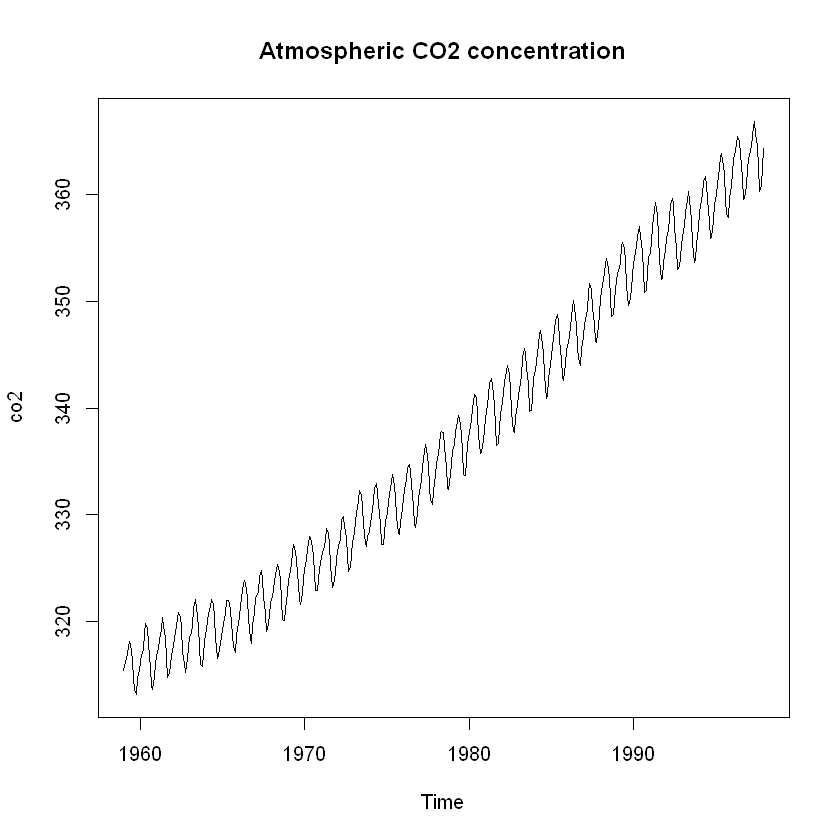

In [4]:
plot(co2, main = "Atmospheric CO2 concentration")

### Building a linear model for co2 dataset

#### Method 1(manually)

In [5]:
co2.values = as.numeric(co2)
co2.times = as.numeric(time(co2))

In [6]:
SSxx = sum((co2.times - mean(co2.times))*(co2.times - mean(co2.times)))
SSxy = sum((co2.values - mean(co2.values))*(co2.times - mean(co2.times)))
slope = SSxy/SSxx
intercept = mean(co2.values) - slope*mean(co2.times)

In [10]:
cat("Slope = ",slope, "\nIntercept = ", intercept)

Slope =  1.307497 
Intercept =  -2249.774

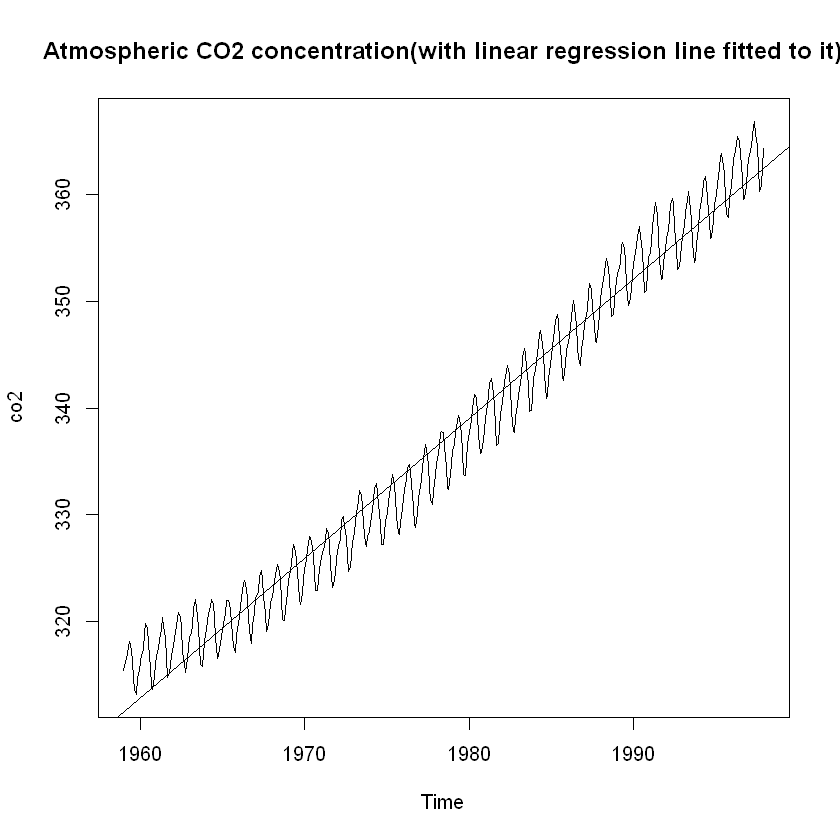

In [13]:
plot(co2, main = "Atmospheric CO2 concentration(with linear regression line fitted to it)")
abline(intercept,slope)

#### Method 2 (using inbuilt linear model)

In [15]:
co2.linear.model = lm(co2~time(co2))

In [16]:
co2.linear.model


Call:
lm(formula = co2 ~ time(co2))

Coefficients:
(Intercept)    time(co2)  
  -2249.774        1.307  


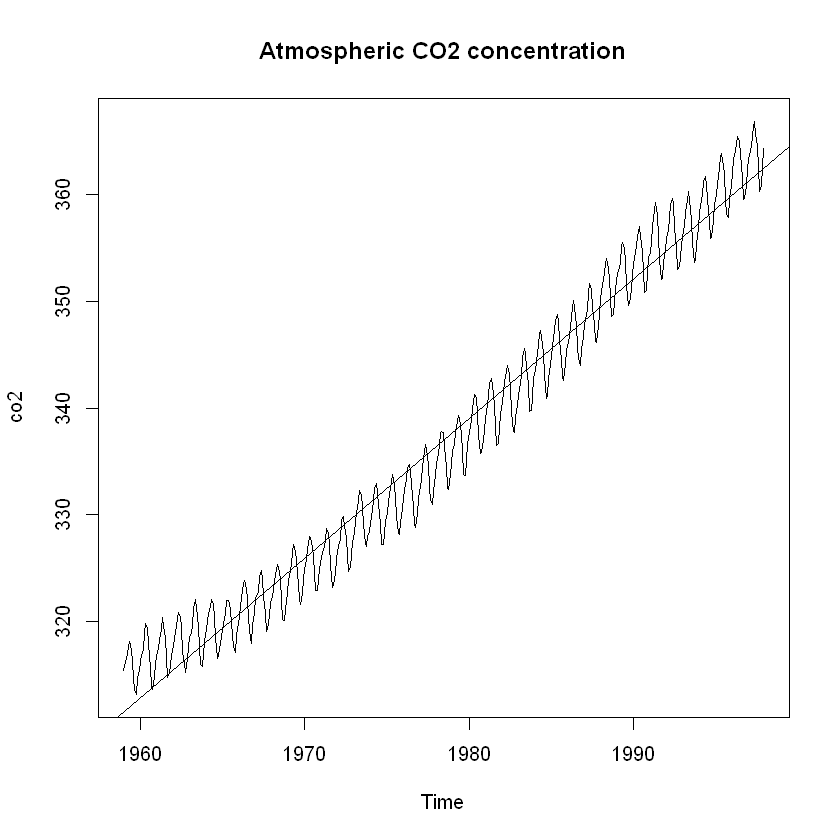

In [17]:
plot(co2, main = "Atmospheric CO2 concentration")
abline(co2.linear.model)

### Calculating Residuals

In [18]:
#Method 1 (manual)
co2.fitted.values = slope*co2.times + intercept
co2.residuals = co2.values - co2.fitted.values

In [20]:
#Method 2 (using inbuilt R function resid)
co2.residuals = resid(co2.linear.model)

### Checking if residuals follow normal distribution

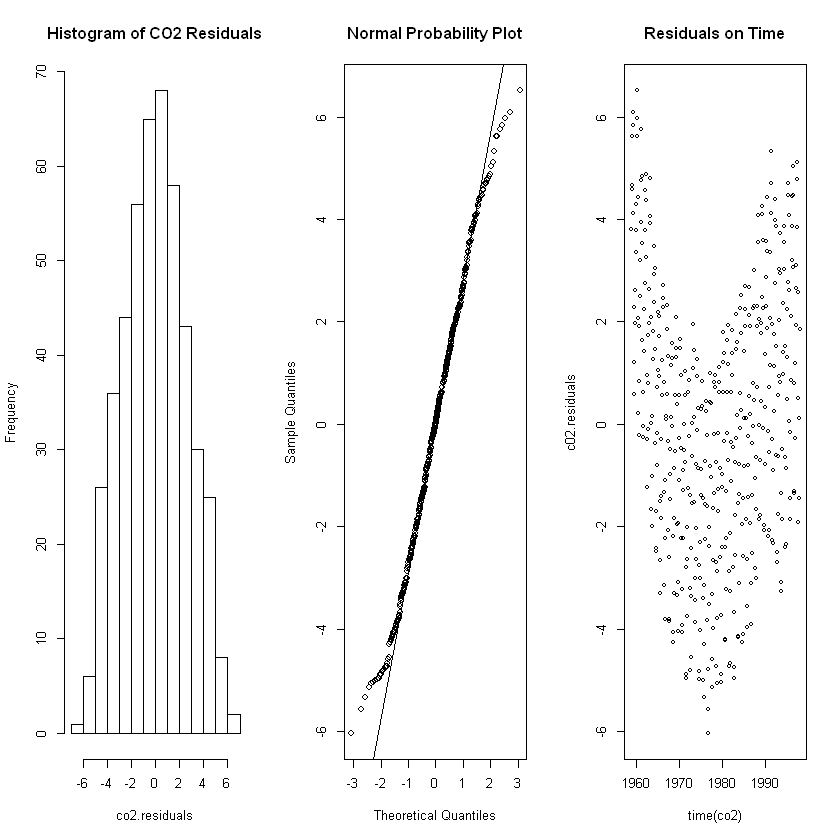

In [22]:
par(mfrow=c(1,3))
c02.residuals = resid( co2.linear.model ) 
hist(co2.residuals, main="Histogram of CO2 Residuals")
qqnorm(c02.residuals, main= "Normal Probability Plot")
qqline(c02.residuals)
plot(c02.residuals ~ time(co2), main="Residuals on Time")

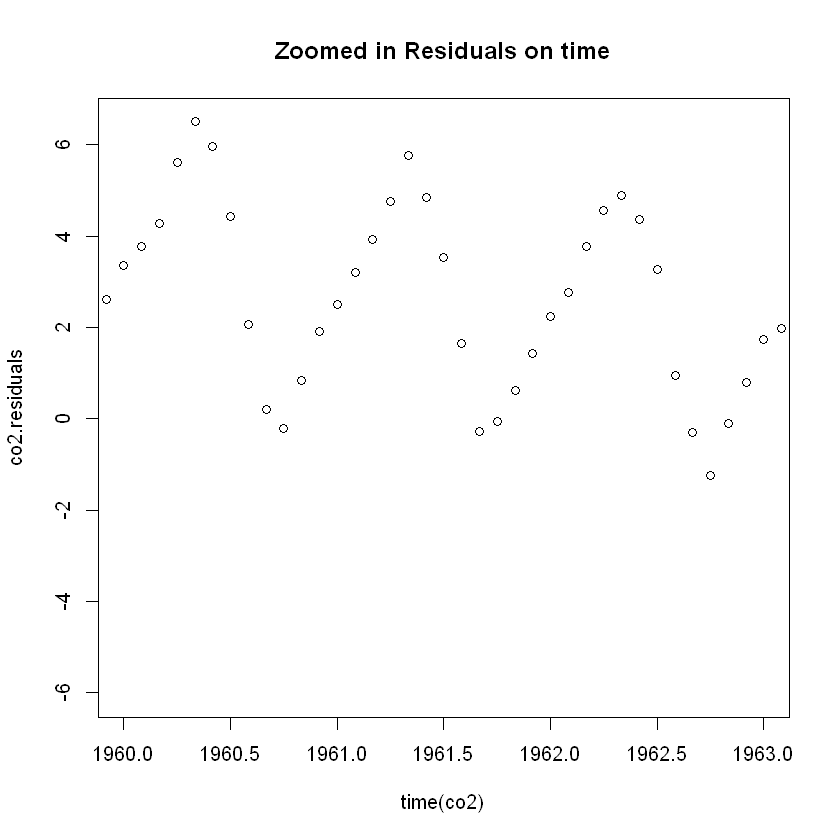

In [25]:
# Checking the seasonality in data
plot(co2.residuals~time(co2), xlim = c(1960,1963), main = "Zoomed in Residuals on time")